In [2]:
import pandas as pd
file_path="~/Documents/tag_daily_pinglun_20191202.csv"
df = pd.read_csv(file_path,delimiter='\t')
selected_columns = ["k.dt", "k.cost_price", 'rank2']
df = df[selected_columns]
print(df)


           k.dt  k.cost_price  rank2
0      20191202       10.8790      1
1      20191202        8.9530      2
2      20191202        5.7760      3
3      20191202        5.6997      4
4      20191202        4.7387      5
...         ...           ...    ...
16988  20191202        0.0280     94
16989  20191202        0.0280     95
16990  20191202        0.0280     96
16991  20191202        0.0280     97
16992  20191202        0.0280     98

[16993 rows x 3 columns]


In [3]:
df.count()

k.dt            16993
k.cost_price    16993
rank2           16993
dtype: int64

In [4]:


# 2. 计算统计量
stats = df.agg(['mean', 'var', 'max', 'min'])

# 3. 打印结果（转置后更易读）
# print(stats.T)  # 保留两位小数
print(stats.T.to_string(float_format="%.2f"))  # 保留两位小数

# print(stats)

                    mean    var         max         min
k.dt         20191202.00   0.00 20191202.00 20191202.00
k.cost_price        0.72   6.92      187.32        0.01
rank2              50.05 821.61      100.00        1.00


In [5]:
distribution = df['k.cost_price'].value_counts(normalize=False)
normalized_dist = df['k.cost_price'].value_counts(normalize=True)
print("distribution: ", distribution)

distribution:  0.0560    165
0.0400    164
0.0350    162
0.0700    141
0.0420    124
         ... 
0.4951      1
0.5755      1
0.6132      1
0.6105      1
0.0977      1
Name: k.cost_price, Length: 7171, dtype: int64


In [6]:
bins = [0, 1, 5, 10, 100]  # 自定义分箱区间
labels = ['<1', '1-5', '5-10', '>10']
df['cost_price_group'] = pd.cut(df['k.cost_price'], bins=bins, labels=labels)
cost_dist = df['cost_price_group'].value_counts(sort=False)  # sort=False保持原始分箱顺序
print(cost_dist)


def remove_outliers_std(df, column_name, n_std=3):
    """
    删除超出n_std倍标准差的异常值
    """
    mean = df[column_name].mean()
    std = df[column_name].std()
    cutoff = std * n_std
    lower, upper = mean - cutoff, mean + cutoff
    return df[(df[column_name] >= lower) & (df[column_name] <= upper)].copy()
df = remove_outliers_std(df, 'k.cost_price')

<1      14373
1-5      2261
5-10      241
>10       116
Name: cost_price_group, dtype: int64


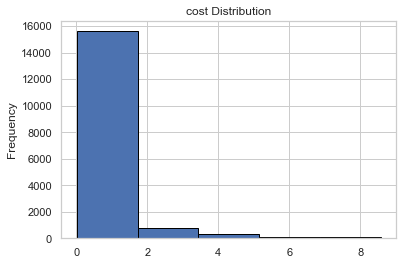

In [7]:
import matplotlib.pyplot as plt

# 直方图（数值型）
df['k.cost_price'].plot(kind='hist', bins=5, edgecolor='black')
plt.title('cost Distribution')
plt.show()

# # 条形图（类别型）
# df['category'].value_counts().plot(kind='bar')
# plt.title('Category Distribution')
# plt.show()

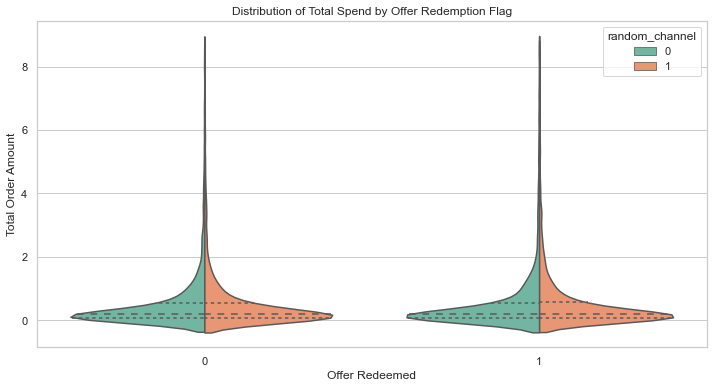

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Example: df = pd.read_csv("gdp_extract.csv")

sns.set(style="whitegrid")
df['random_01'] = np.random.randint(0, 2, size=len(df))
df['random_channel'] = np.random.randint(0, 2, size=len(df))
plt.figure(figsize=(12, 6))
sns.violinplot(
    x="random_01",  # Binary flag
    y="k.cost_price",   # Continuous value
    data=df,
    hue="random_channel",            # Optional: split by channel (email, push, app)
    split=True,
    inner="quartile",         # Show box inside
    palette="Set2"
)
plt.title("Distribution of Total Spend by Offer Redemption Flag")
plt.xlabel("Offer Redeemed")
plt.ylabel("Total Order Amount")
plt.show()


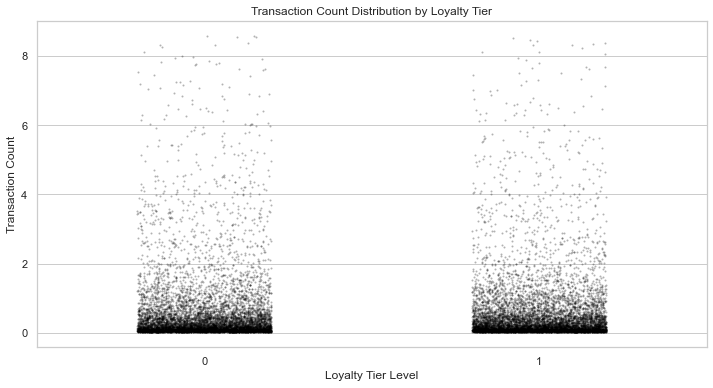

In [48]:
plt.figure(figsize=(12, 6))
# sns.boxplot(
#     x="random_01",
#     y="k.cost_price",
#     data=df,
#     palette="Blues",
#     fliersize=2
# )
sns.stripplot(
    x="random_01",
    y="k.cost_price",
    data=df,
    color="black",
    size=2,
    jitter=0.2,
    alpha=0.3
)
plt.title("Transaction Count Distribution by Loyalty Tier")
plt.ylabel("Transaction Count")
plt.xlabel("Loyalty Tier Level")
plt.show()

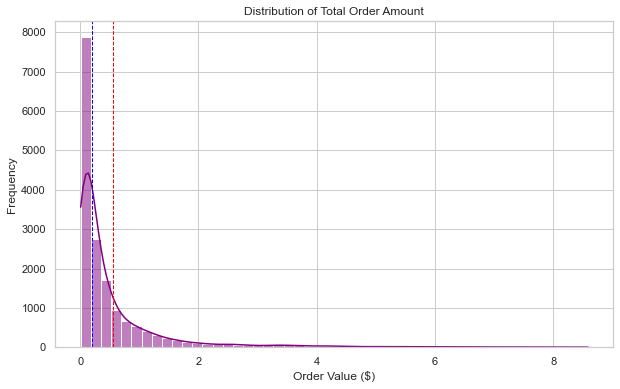

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df["k.cost_price"],
    bins=50,
    kde=True,
    color="purple"
)
plt.title("Distribution of Total Order Amount")
plt.xlabel("Order Value ($)")
plt.ylabel("Frequency")
plt.axvline(df["k.cost_price"].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df["k.cost_price"].median(), color='blue', linestyle='dashed', linewidth=1)
plt.show()